In [13]:
import pandas as pd
import os

directory = 'filtered_data'
all_grouped = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)

        grouped = df.groupby('subjects_count').agg(
            average_score=('average_score', 'mean'),
            student_count=('average_score', 'size')
        ).reset_index()

        year = os.path.splitext(filename)[0]
        grouped['year'] = int(year)

        all_grouped.append(grouped)

final_df = pd.concat(all_grouped, ignore_index=True)

final_df = final_df[['year', 'subjects_count', 'student_count', 'average_score']]

# Вивести
print(final_df)


/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_30531/2046239137.py:10: DtypeWarning: Columns (96,97,100,102,103,104,105,116,117,120,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_30531/2046239137.py:10: DtypeWarning: Columns (117,118,121,123,124,125,126,137,138,141,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_30531/2046239137.py:10: DtypeWarning: Columns (8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_30531/2046239137.py:10: DtypeWarning: Columns (100,116,117,120,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path

   year  subjects_count  student_count  average_score
0  2020               3         111450     144.674869
1  2020               4          89762     143.877578
2  2021               3          54982     149.071639
3  2021               4         111856     145.252179
4  2021               5          21771     139.196546
5  2023               3         256313     143.488288
6  2022               3         213647     151.401806
7  2019               3          87177     146.631266
8  2019               4          85557     145.215475
9  2024               4         264164     139.986065


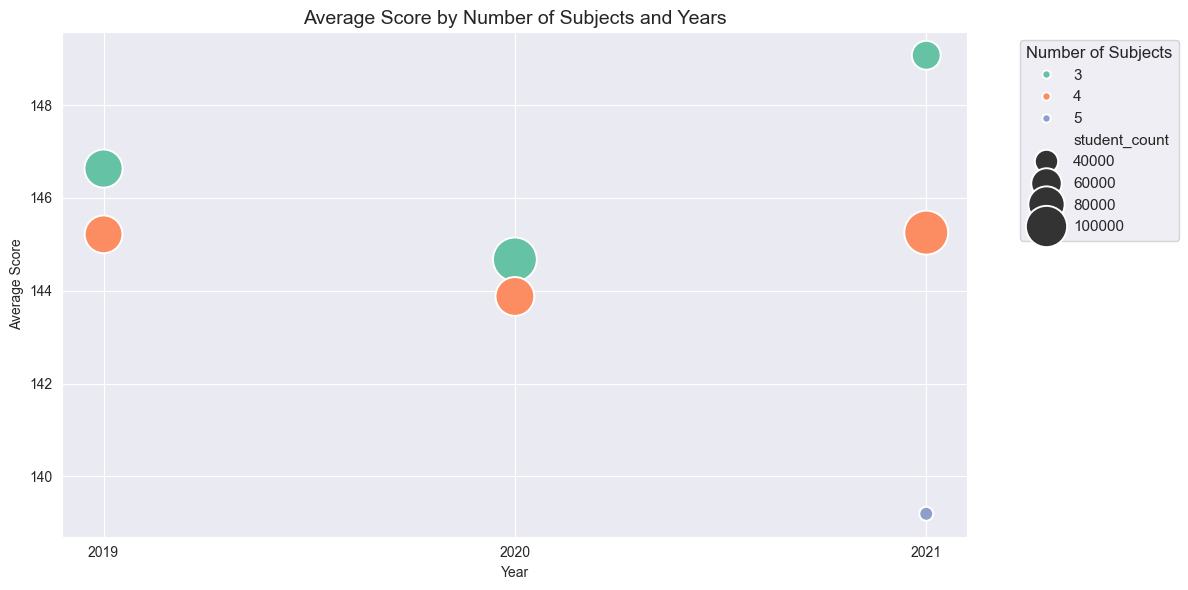

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering
year_counts = final_df['year'].value_counts()
valid_years = year_counts[year_counts >= 2].index
df_filtered = final_df[final_df['year'].isin(valid_years)]

# Plotting
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df_filtered[df_filtered['subjects_count'] > 2],
    x='year',
    y='average_score',
    size='student_count',
    hue='subjects_count',
    sizes=(100, 1000),
    palette='Set2',
    legend='brief'
)

# Extract only the legend for hue
handles, labels = scatter.get_legend_handles_labels()
start_idx = next(i for i, l in enumerate(labels) if l.isdigit())

# New, clean legend only for subjects_count with larger font
plt.legend(
    handles[start_idx:],
    labels[start_idx:],
    title='Number of Subjects',
    title_fontsize=12,
    fontsize=11,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.title('Average Score by Number of Subjects and Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(sorted(df_filtered['year'].unique()))
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import os

directory = 'filtered_data'
all_data = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)

        # Витягуємо рік із назви файлу
        year = os.path.splitext(filename)[0]
        df['year'] = int(year)

        # Витягуємо потрібні колонки
        selected_df = df[['year', 'subjects_count', 'average_score']]

        all_data.append(selected_df)

# Конкатенація всіх датафреймів
final_df = pd.concat(all_data, ignore_index=True)
final_df = final_df[final_df['year'] <= 2022]
# Вивести результат
print(final_df)

/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_30531/2719984068.py:10: DtypeWarning: Columns (96,97,100,102,103,104,105,116,117,120,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_30531/2719984068.py:10: DtypeWarning: Columns (117,118,121,123,124,125,126,137,138,141,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_30531/2719984068.py:10: DtypeWarning: Columns (8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_30531/2719984068.py:10: DtypeWarning: Columns (100,116,117,120,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path

         year  subjects_count  average_score
0        2020               4     109.250000
1        2020               3     140.333333
2        2020               4     128.500000
3        2020               3     129.000000
4        2020               4     150.500000
...       ...             ...            ...
1032510  2019               4     133.750000
1032511  2019               4     166.750000
1032512  2019               4     164.250000
1032513  2019               4     185.500000
1032514  2019               4     118.500000

[776202 rows x 3 columns]



Total rows in 2019: 172734
subjects_count
3    87177
4    85557
Name: count, dtype: int64
Kruskal-Wallis Test (2019 only): H-statistic = 100.2626, p-value = 0.0000


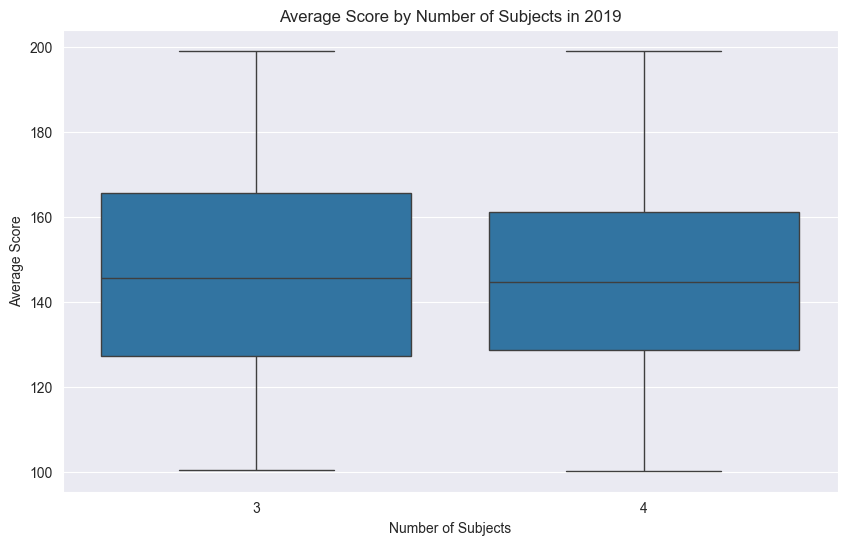

Dunn's Post-Hoc Test Results (2019 only):
              3             4
3  1.000000e+00  1.334753e-23
4  1.334753e-23  1.000000e+00

Total rows in 2020: 201212
subjects_count
3    111450
4     89762
Name: count, dtype: int64
Kruskal-Wallis Test (2020 only): H-statistic = 12.9627, p-value = 0.0003


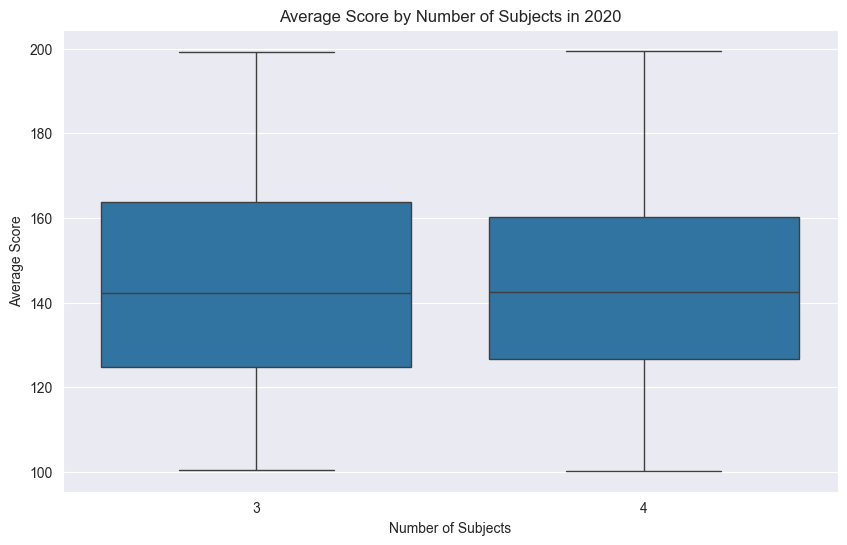

Dunn's Post-Hoc Test Results (2020 only):
          3         4
3  1.000000  0.000318
4  0.000318  1.000000

Total rows in 2021: 188609
subjects_count
4    111856
3     54982
5     21771
Name: count, dtype: int64
Kruskal-Wallis Test (2021 only): H-statistic = 2618.5369, p-value = 0.0000


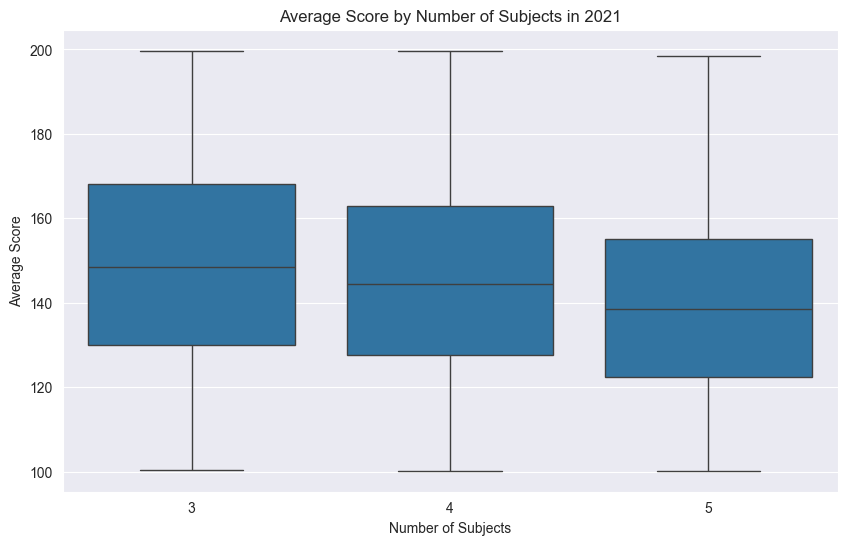

Dunn's Post-Hoc Test Results (2021 only):
               3              4              5
3   1.000000e+00  2.060375e-189   0.000000e+00
4  2.060375e-189   1.000000e+00  5.844936e-253
5   0.000000e+00  5.844936e-253   1.000000e+00


In [16]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from scikit_posthocs import posthoc_dunn
    posthoc_available = True
except ImportError:
    print("Warning: scikit-posthocs not found. Dunn's test will be skipped. Install it with 'pip install scikit-posthocs'.")
    posthoc_available = False

# Фільтрація років до 2022 включно
final_df = final_df[final_df['year'] <= 2022]

# Аналіз для 2019 року
df_2019 = final_df[final_df['year'] == 2019]
print(f"\nTotal rows in 2019: {len(df_2019)}")
print(df_2019['subjects_count'].value_counts())
kruskal_result_2019 = stats.kruskal(
    df_2019[df_2019['subjects_count'] == 3]['average_score'].dropna(),
    df_2019[df_2019['subjects_count'] == 4]['average_score'].dropna()
)
print(f'Kruskal-Wallis Test (2019 only): H-statistic = {kruskal_result_2019.statistic:.4f}, p-value = {kruskal_result_2019.pvalue:.4f}')
plt.figure(figsize=(10, 6))
sns.boxplot(x='subjects_count', y='average_score', data=df_2019)
plt.title('Average Score by Number of Subjects in 2019')
plt.xlabel('Number of Subjects')
plt.ylabel('Average Score')
plt.show()
if kruskal_result_2019.pvalue < 0.05 and posthoc_available and len(df_2019['subjects_count'].unique()) > 1:
    posthoc_result_2019 = posthoc_dunn(df_2019, val_col='average_score', group_col='subjects_count')
    print("Dunn's Post-Hoc Test Results (2019 only):")
    print(posthoc_result_2019)

# Аналіз для 2020 року
df_2020 = final_df[final_df['year'] == 2020]
print(f"\nTotal rows in 2020: {len(df_2020)}")
print(df_2020['subjects_count'].value_counts())
kruskal_result_2020 = stats.kruskal(
    df_2020[df_2020['subjects_count'] == 3]['average_score'].dropna(),
    df_2020[df_2020['subjects_count'] == 4]['average_score'].dropna()
)
print(f'Kruskal-Wallis Test (2020 only): H-statistic = {kruskal_result_2020.statistic:.4f}, p-value = {kruskal_result_2020.pvalue:.4f}')
plt.figure(figsize=(10, 6))
sns.boxplot(x='subjects_count', y='average_score', data=df_2020)
plt.title('Average Score by Number of Subjects in 2020')
plt.xlabel('Number of Subjects')
plt.ylabel('Average Score')
plt.show()
if kruskal_result_2020.pvalue < 0.05 and posthoc_available and len(df_2020['subjects_count'].unique()) > 1:
    posthoc_result_2020 = posthoc_dunn(df_2020, val_col='average_score', group_col='subjects_count')
    print("Dunn's Post-Hoc Test Results (2020 only):")
    print(posthoc_result_2020)

# Аналіз для 2021 року (залишаємо як у вашому коді)
df_2021 = final_df[final_df['year'] == 2021]
print(f"\nTotal rows in 2021: {len(df_2021)}")
print(df_2021['subjects_count'].value_counts())
kruskal_result_2021 = stats.kruskal(
    df_2021[df_2021['subjects_count'] == 3]['average_score'].dropna(),
    df_2021[df_2021['subjects_count'] == 4]['average_score'].dropna(),
    df_2021[df_2021['subjects_count'] == 5]['average_score'].dropna()
)
print(f'Kruskal-Wallis Test (2021 only): H-statistic = {kruskal_result_2021.statistic:.4f}, p-value = {kruskal_result_2021.pvalue:.4f}')
plt.figure(figsize=(10, 6))
sns.boxplot(x='subjects_count', y='average_score', data=df_2021)
plt.title('Average Score by Number of Subjects in 2021')
plt.xlabel('Number of Subjects')
plt.ylabel('Average Score')
plt.show()
if kruskal_result_2021.pvalue < 0.05 and posthoc_available and len(df_2021['subjects_count'].unique()) > 1:
    posthoc_result_2021 = posthoc_dunn(df_2021, val_col='average_score', group_col='subjects_count')
    print("Dunn's Post-Hoc Test Results (2021 only):")
    print(posthoc_result_2021)